## **Prepare environment, load and prepare data**

Required environment

*  Python 3.12.12
*  numpy: 2.0.2
*  pandas: 2.2.2
*  seaborn: 0.13.2
*  matplotlib: 3.10.0










In [1]:
!python --version

Python 3.12.12


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("pandas:",pd.__version__)
print("numpy:",np.__version__)
print("seaborn:",sns.__version__)
print("matplotlib:",plt.matplotlib.__version__)

pandas: 2.2.2
numpy: 2.0.2
seaborn: 0.13.2
matplotlib: 3.10.0


In [3]:
# import dataset

df = pd.read_csv('https://data.ontario.ca/dataset/1f14addd-e4fc-4a07-9982-ad98db07ef86/resource/4cc07c1b-62ed-4ece-a2a4-d05d0f45081c/download/img-wage-rate-by-edu-age-sex-ft-pt-ca-on-2006-24.csv')

In [4]:
# Rename the ' Men' column to 'Men Wage' and ' Women' to 'Women Wage' to remove
# leading space and add clarity
df_renamed = df.rename(columns={' Men': 'Men_Wage', ' Women': 'Women_Wage'})

# Display the first few rows to show the renamed columns
display(df_renamed.head())

,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men_Wage,Women_Wage
0,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",15 +,17.5,19.2,16.0
1,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 +,19.4,21.5,17.5
2,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 34,18.0,19.0,16.8
3,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 54,19.5,21.5,17.8
4,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 64,19.5,21.5,17.6


In [5]:
# change "0.0" in dataset to NaN and flag as suppressed
for col in ['Men_Wage', 'Women_Wage']:
    # Create a new column to flag suppressed values for each gender
    df_renamed[f'{col}_is_suppressed'] = df_renamed[col].astype(str).str.strip() == "0.0"
    # Replace "0.0" strings with np.nan
    df_renamed[col] = df_renamed[col].replace('0.0', np.nan)

# Display the first few rows to show the new columns and replaced values
display(df_renamed.head())

,YEAR,GEOGRAPHY,IMMIGRANT,TYPE OF WORK,WAGE RATE,EDUCATION,AGE GROUP,Both sexes,Men_Wage,Women_Wage,Men_Wage_is_suppressed,Women_Wage_is_suppressed
0,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",15 +,17.5,19.2,16.0,False,False
1,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 +,19.4,21.5,17.5,False,False
2,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 34,18.0,19.0,16.8,False,False
3,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 54,19.5,21.5,17.8,False,False
4,2006,Canada,Total,All employees,Median hourly wage,"Total, all education levels",25 - 64,19.5,21.5,17.6,False,False


In [6]:
# Filter for Ontario
df_ontario = df_renamed[df_renamed['GEOGRAPHY'] == ' Ontario']

# **Research Question 4**

Verify the correlation between education levels and wages between genders.

Method: Conduct a correlation analysis using Pearson correlation between education level and wages for each gender.

Use ANCOVA (analysis of covariance) to verify the effects of education levels on wages between genders.

In [7]:
# One-hot encode the 'EDUCATION' column from the original df_ontario
df_ontario_education_encoded = pd.get_dummies(df_ontario, columns=['EDUCATION'], drop_first=True)

# Select the columns of interest: encoded education levels, Men_Wage, Women_Wage, and YEAR
education_cols = [col for col in df_ontario_education_encoded.columns if 'EDUCATION_' in col]
correlation_cols = education_cols + ['Men_Wage', 'Women_Wage', 'YEAR']

# Calculate the correlation matrix for the selected columns
correlation_matrix_education_wages_year = df_ontario_education_encoded[correlation_cols].corr()

# Display the correlation matrix
display(correlation_matrix_education_wages_year)

,EDUCATION_ Bachelor's degree,EDUCATION_ 0 - 8 years,EDUCATION_ High school graduate,EDUCATION_ Post-secondary certificate or diploma,EDUCATION_ Some high school,EDUCATION_ Some post-secondary,EDUCATION_ University degree,"EDUCATION_Total, all education levels",Men_Wage,Women_Wage,YEAR
EDUCATION_ Bachelor's degree,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,0.146492,0.196122,-2.102224e-16
EDUCATION_ 0 - 8 years,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-0.277711,-0.360299,-1.060560e-15
EDUCATION_ High school graduate,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-0.090160,-0.109367,-6.382926e-16
EDUCATION_ Post-secondary certificate or diploma,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,0.006639,0.036347,-8.347039e-16
EDUCATION_ Some high school,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-1.250000e-01,-0.219938,-0.287164,-1.118269e-15
EDUCATION_ Some post-secondary,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,-1.250000e-01,-0.191635,-0.202056,-1.931361e-16
EDUCATION_ University degree,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,-1.250000e-01,0.235688,0.271631,-6.369096e-16
"EDUCATION_Total, all education levels",-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,-1.250000e-01,1.000000e+00,0.088542,0.096583,3.195423e-16
Men_Wage,1.464917e-01,-2.777110e-01,-9.015991e-02,6.639047e-03,-2.199384e-01,-1.916353e-01,2.356885e-01,8.854166e-02,1.000000,0.871257,2.020610e-01
Women_Wage,1.961218e-01,-3.602992e-01,-1.093668e-01,3.634654e-02,-2.871640e-01,-2.020557e-01,2.716306e-01,9.658311e-02,0.871257,1.000000,2.006960e-01


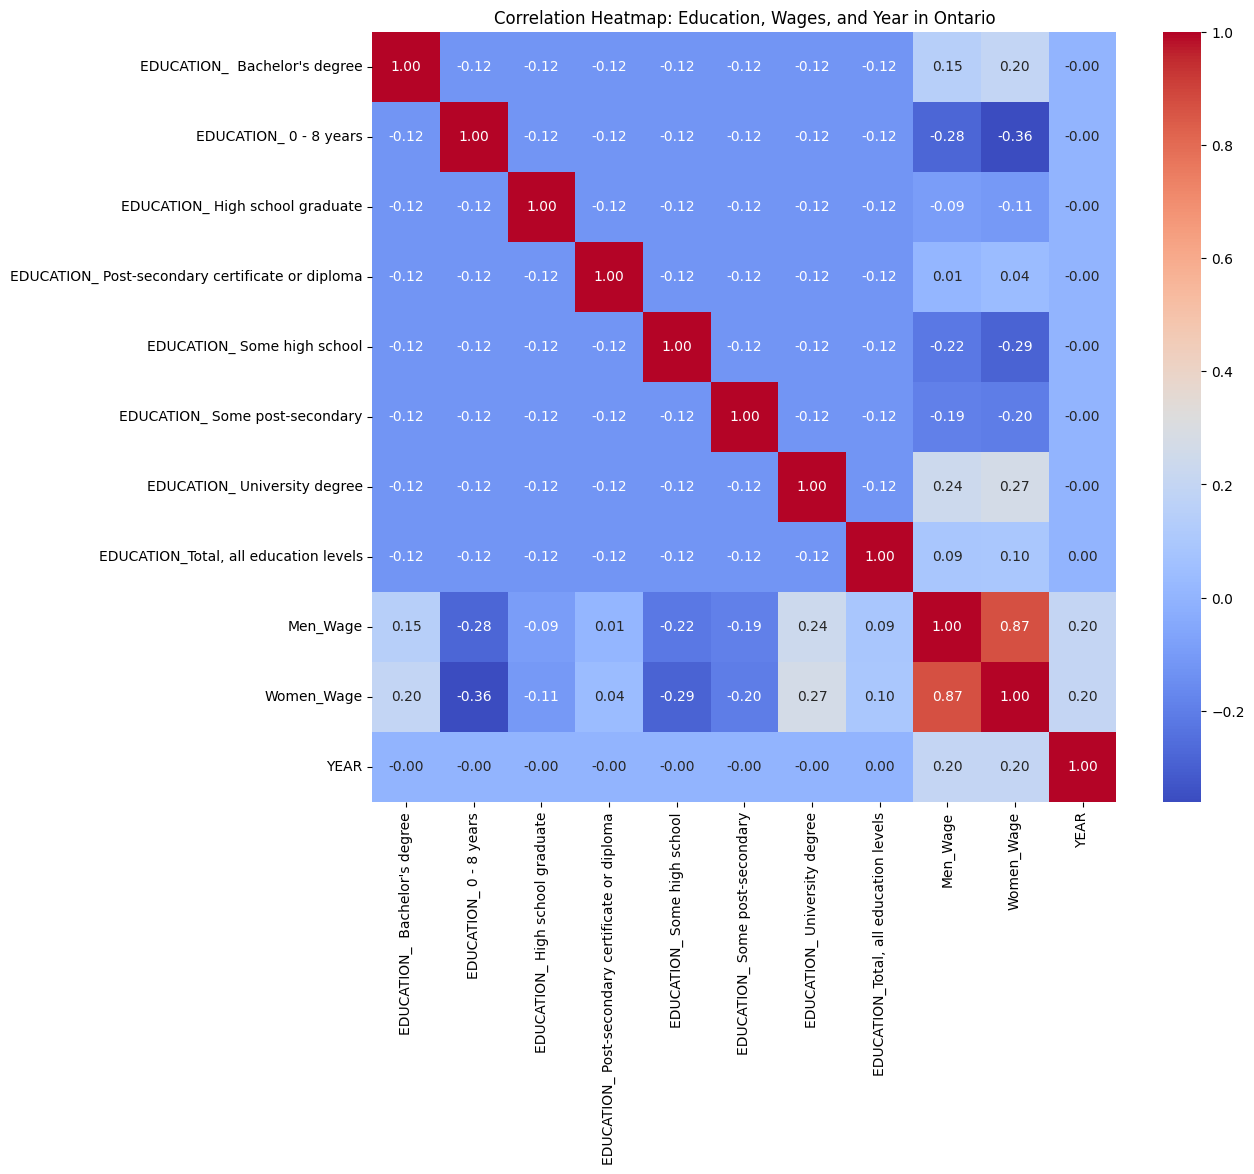

In [8]:
# Generate a heatmap of the education correlation matrix
plt.figure(figsize=(12, 10)) # Adjust the figure size for better readability
sns.heatmap(correlation_matrix_education_wages_year, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Education, Wages, and Year in Ontario')
plt.show()

Based on the correlation_matrix_education_wages_year:



*   There is a positive correlation between having a 'University degree' and both 'Men_Wage' (0.24) and 'Women_Wage' (0.27)
*   'Bachelor's degree' shows a positive correlation with bot 'Men_Wage" (0.15) and "Women_Wage" (0.20), although slightly lower

This suggests that individuals with a university degree or Bachelor's degree tend to have higher wages.



*   There is a negative correlation between having education '0 - 8 years' with both 'Men_Wage' (-0.28) and 'Women_Wage' (-0.36)
*   There is a negative correlation also between having 'Some high school' with both 'Men_Wage' (-0.22) and 'Women_Wage' (-0.29)

This suggests that individuals with lower levels of education tend to have lower wages.

Other education levels like 'High school graduate', 'Post-secondary certificate or diploma', and 'Some post-secondary' show weaker correlations with wages, both positive and negative, depending on the specific category and gender.

The strength of the correlation seems to differ slightly. For example, having a 'University degree' appears to have a slightly stronger positive correlation with 'Women_Wage' (0.27) compared to 'Men_Wage' (0.24). Conversely, '0 - 8 years' of education has a stronger negative correlation with 'Women_Wage' (-0.36) compared to 'Men_Wage' (-0.28).


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Melt the DataFrame to create a 'GENDER' column and a single 'Wage' column
df_ancova = df_ontario.melt(
    id_vars=['YEAR', 'GEOGRAPHY', 'IMMIGRANT', 'TYPE OF WORK', 'WAGE RATE', 'EDUCATION'],
    value_vars=['Men_Wage', 'Women_Wage'],
    var_name='GENDER',
    value_name='Wage'
)

# Clean up the GENDER column names from 'Men_Wage'/'Women_Wage' to 'Men'/'Women'
df_ancova['GENDER'] = df_ancova['GENDER'].replace({'Men_Wage': 'Men', 'Women_Wage': 'Women'})

# Ensure 'EDUCATION' and 'GENDER' are categorical
df_ancova['EDUCATION'] = df_ancova['EDUCATION'].astype('category')
df_ancova['GENDER'] = df_ancova['GENDER'].astype('category')

# Drop rows where 'Wage' is NaN, as these were suppressed values (0.0)
df_ancova = df_ancova.dropna(subset=['Wage'])

# ANCOVA-style regression: Wage ~ Gender + Education + Gender*Education
# This tests whether returns to education differ by gender
model = ols('Wage ~ C(GENDER) * C(EDUCATION)', data=df_ancova).fit()

# Type II ANOVA table (appropriate for unbalanced designs)
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANCOVA Results: Wage ~ Gender * Education")
print(anova_table)


ANCOVA Results: Wage ~ Gender * Education
                              sum_sq       df            F         PR(>F)
C(GENDER)               4.927020e+04      1.0   616.853567  3.617850e-135
C(EDUCATION)            1.919236e+06      8.0  3003.558263   0.000000e+00
C(GENDER):C(EDUCATION)  3.307539e+03      8.0     5.176220   1.760725e-06
Residual                3.276567e+06  41022.0          NaN            NaN




*   **C(GENDER)**: The p-value is extremely small (3.617850e-135), which is much less than 0.05. This indicates a highly statistically significant main effect of gender on wages. There is a significant difference in average wages between men and women, even after accounting for education levels.

*   **C(EDUCATION)**: The p-value is also extremely small (0.000000e+00), well below 0.05. This indicates a highly statistically significant main effect of education on wages. This means that different education levels are associated with significantly different average wages, regardless of gender.


*   **C(GENDER):C(EDUCATION)**: The p-value is 1.760725e-06, which is also much less than 0.05. This indicates a statistically significant interaction effect between gender and education. This suggests the effect of education on wages is not the same for men and women. The relationship between education level and wage varies depending on whether the individual is male or female.

This is aligned with our correlation analysis above that suggests education varies between men and women.


